# Data Wrangling
- Processo de preparação de dados, também conhecido como 'Data Preparation'

## Tratamento dos dados obtidos
- Coletar, limpar, normalizar, combinar, estruturar e organizar os dados que serão analisados.

#### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

#### Lendo dados

In [2]:
# via arquivo local
data = './imports-85.data'
df = pd.read_csv(data)
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


#### Lendo colunas

In [3]:
# via arquivo local
with open('./imports-85.names', 'r') as colunas:
    print(colunas.read())

Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1

#### Subistituindo cabeçalho

In [4]:
colunas = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
df = pd.read_csv(data, names = colunas)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
df.shape

(205, 26)

#### Analisando tipos dos valores por coluna

In [7]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Alterando o tipo

In [8]:
colunas = ['bore','stroke','horsepower','peak-rpm','price']
df[colunas] = df[colunas].apply(pd.to_numeric, errors='coerce')

In [9]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Tratamento de Dados Nulos
- Valores numéricos inexistentes representados pelo valor de ponto flutuante **NaN**.

#### Substituindo '?' por NaN (Not a Number)

In [10]:
df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### Analisando Dados Nulos

In [11]:
dados_nulos = df.isnull()
dados_nulos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Quantidade de dados nulos por colunas

In [12]:
qtd_nulos = df.isna().sum()
qtd_nulos[qtd_nulos > 0].sort_values(ascending=False)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
dtype: int64

In [13]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### Quantidade / porcentagem

In [14]:
total_dados_nulos = df.isnull().sum().sort_values(ascending=False)
porcentagem = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
df_nulos = pd.concat([total_dados_nulos, porcentagem], axis=1, keys=['Total_nulos', 'Porcentagem'])
df_nulos.query('Total_nulos != 0', inplace = True)
df_nulos

,Total_nulos,Porcentagem
normalized-losses,41,0.200000
price,4,0.019512
stroke,4,0.019512
bore,4,0.019512
peak-rpm,2,0.009756
horsepower,2,0.009756
num-of-doors,2,0.009756


#### Plotando porcentagem de dados nulos

Text(0.5, 1.0, 'Porcentagem de valores nulos')

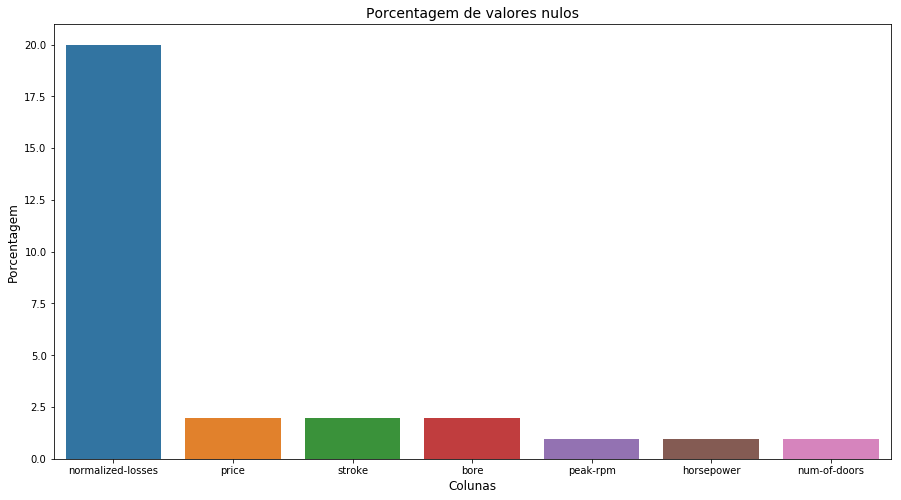

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x = df_nulos.index, y = df_nulos['Porcentagem'] * 100)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Porcentagem', fontsize=12)
plt.title('Porcentagem de valores nulos', fontsize=14)

## Métodos de limpeza de dados Nulos
Alguns métodos de limpeza de dados nulos

- fillna(method='bfill')
- fillna(method='ffill')
- dropna(how='any')
- fillna(mean)
- fillna(median)
- fillna(freq)
- fillna('Valor fixo')

#### Método 'bfill'

In [16]:
df_sem_nulos = df.fillna(method='bfill')
df_sem_nulos.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Método 'ffill'


In [17]:
df_sem_nulos2 = df.fillna(method='ffill')
df_sem_nulos2.isna().sum()

symboling            0
normalized-losses    3
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Retirada de todos os dados nulos

In [18]:
df_sem_nulos3 = df.dropna(axis = 0, how='any')
df_sem_nulos3.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### pela média dos valores

In [19]:
colunas = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
df_mean = df[colunas].astype('float64').mean()
df_sem_nulos4 = df.fillna(df_mean)
df_sem_nulos4.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### pela mediana

In [20]:
colunas = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
df_median = df[colunas].astype('float64').median()
df_sem_nulos5 = df.fillna(df_median)
df_sem_nulos5.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### pela frequencia de valores

In [21]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [22]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [23]:
df_sem_nulos5 = df.fillna(df['num-of-doors'].value_counts().idxmax())
df_sem_nulos5.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### por um valor fixo

In [24]:
df['num-of-doors'].isna().sum()

2

In [25]:
df_sem_nulos6 = df.fillna('Não informado')
df_sem_nulos6['num-of-doors'].isna().sum()

0

## Transformando Dados

#### Visualizando dados

In [26]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [27]:
df[['city-mpg']].head()

,city-mpg
0,21
1,21
2,19
3,24
4,18


#### Transformando 'Miles per Gallon (MPG) ' para 'Litros por Quilometros (L/km)' 

In [28]:
df['city-L/100km'] = 235/df['city-mpg']

In [29]:
df[['city-L/100km']].head()

,city-L/100km
0,11.190476
1,11.190476
2,12.368421
3,9.791667
4,13.055556


In [30]:
df['highway-L/100km'] = 235/df['highway-mpg']

In [31]:
df[['highway-L/100km']].head()

,highway-L/100km
0,8.703704
1,8.703704
2,9.038462
3,7.833333
4,10.681818


## Normalização/Padronização de Dados
- Simple Scaling
- Min-max 
- Z-score

#### Visualizando dados originais das colunas

In [32]:
df[['length','width','height']].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


#### boxplot das colunas

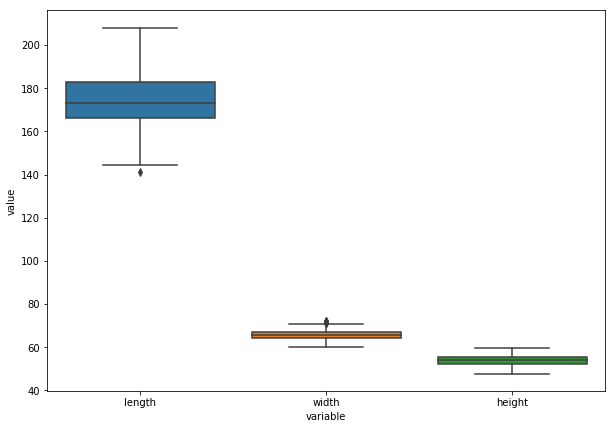

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(x='variable', y='value', data=pd.melt(df[['length','width','height']]))

#### distplot das colunas

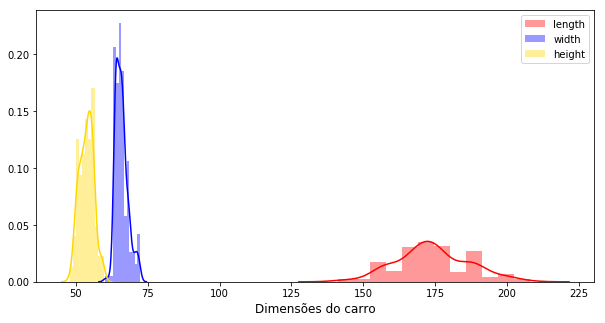

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(df['length'] , color='red', label='length')
sns.distplot(df['width'] , color='blue', label='width')
sns.distplot(df['height'] , color='gold', label='height')
plt.xlabel('Dimensões do carro', fontsize=12)
plt.legend();

### Método Simple Scaling - Normalizando

#### Normalizando dados

In [35]:
df_1 = df

df_1['length'] = df_1['length']/df_1['length'].max()
df_1['width'] = df_1['width']/df_1['width'].max()
df_1['height'] = df_1['height']/df_1['height'].max()

df_1[['length','width','height']].head()

,length,width,height
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


#### Plotagem dos dados normalizados

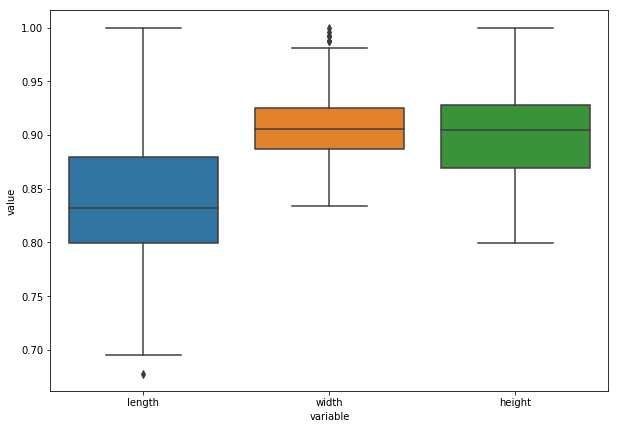

In [36]:
plt.figure(figsize=(10,7))
sns.boxplot(x='variable', y='value', data=pd.melt(df_1[['length','width','height']]))

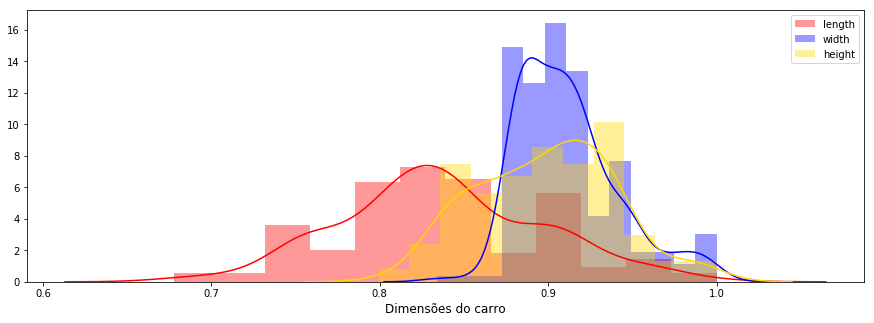

In [37]:
plt.figure(figsize=(15,5))
sns.distplot(df_1['length'] , color="red", label='length')
sns.distplot(df_1['width'] , color="blue", label='width')
sns.distplot(df_1['height'] , color="gold", label='height')
plt.xlabel('Dimensões do carro', fontsize=12)
plt.legend();

### Método Min-Max - Normalizando

#### Normalizando dados - Pandas

In [38]:
df_2 = df

df_2['length'] = (df_2['length']-df_2['length'].min())/(df_2['length'].max()-df_2['length'].min())
df_2['width'] = (df_2['width']-df_2['width'].min())/(df_2['width'].max()-df_2['width'].min())   
df_2['height'] = (df_2['height']-df_2['height'].min())/(df_2['height'].max()-df_2['height'].min())   

df_2[['length','width','height']].head(10)

,length,width,height
0,0.413433,0.316667,0.083333
1,0.413433,0.316667,0.083333
2,0.449254,0.433333,0.383333
3,0.529851,0.491667,0.541667
4,0.529851,0.508333,0.541667
5,0.540299,0.500000,0.441667
6,0.770149,0.925000,0.658333
7,0.770149,0.925000,0.658333
8,0.770149,0.925000,0.675000
9,0.553731,0.633333,0.350000


#### Normalizando dados - Scikit-Learn

In [39]:
df_3 = df
scaler = MinMaxScaler(feature_range=(0,1))

df_3['length'] = scaler.fit_transform(df_3[['length']])
df_3['width'] = scaler.fit_transform(df_3[['width']])
df_3['height'] = scaler.fit_transform(df_3[['height']])

df_3[['length','width','height']].head()

,length,width,height
0,0.413433,0.316667,0.083333
1,0.413433,0.316667,0.083333
2,0.449254,0.433333,0.383333
3,0.529851,0.491667,0.541667
4,0.529851,0.508333,0.541667


#### Plotagem dos dados normalizados

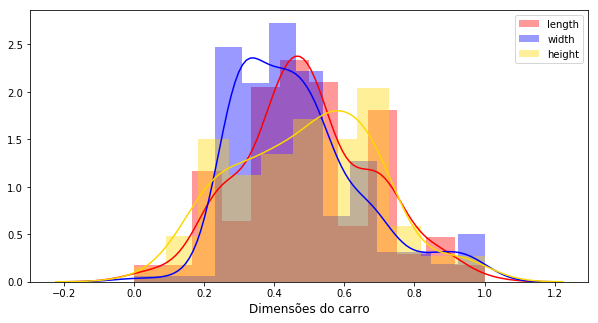

In [40]:
plt.figure(figsize=(10,5))
sns.distplot(df_3['length'] , color='red', label='length')
sns.distplot(df_3['width'] , color='blue', label='width')
sns.distplot(df_3['height'] , color='gold', label='height')
plt.xlabel('Dimensões do carro', fontsize=12)
plt.legend();

### Método Z-Score - Padronização

#### Padronizando dados - Pandas

In [41]:
df_4 = df

df_4['length'] = (df_4['length']-df_4['length'].mean())/(df_4['length'].std())
df_4['width'] = (df_4['width']-df_4['width'].mean())/(df_4['width'].std())
df_4['height'] = (df_4['height']-df_4['height'].mean())/(df_4['height'].std())

df_4[['length','width','height']].head()

,length,width,height
0,-0.425480,-0.842719,-2.015483
1,-0.425480,-0.842719,-2.015483
2,-0.230948,-0.190101,-0.542200
3,0.206750,0.136209,0.235366
4,0.206750,0.229440,0.235366


#### Padronizando dados - Scikit-Learn

In [42]:
df_5 = df
scaler = StandardScaler()

df_5['length'] = scaler.fit_transform(df_5[['length']])
df_5['width'] = scaler.fit_transform(df_5[['width']])
df_5['height'] = scaler.fit_transform(df_5[['height']])

df_5[['length','width','height']].head()

,length,width,height
0,-0.426521,-0.844782,-2.020417
1,-0.426521,-0.844782,-2.020417
2,-0.231513,-0.190566,-0.543527
3,0.207256,0.136542,0.235942
4,0.207256,0.230001,0.235942


#### Plotagem dos dados padronizados

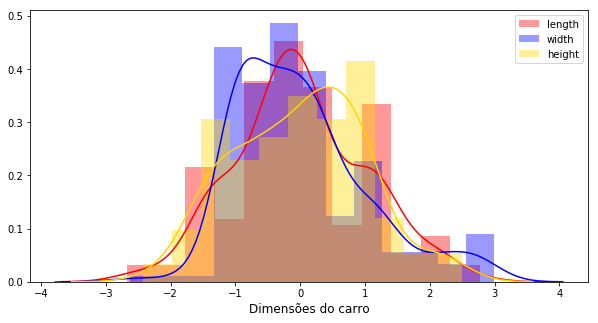

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(df_5['length'] , color='red', label='length')
sns.distplot(df_5['width'] , color='blue', label='width')
sns.distplot(df_5['height'] , color='gold', label='height')
plt.xlabel('Dimensões do carro', fontsize=12)
plt.legend();

## Transformando dados - Binning

#### Criando 4 bins

In [44]:
binwidth = (max(df['horsepower'])-min(df['horsepower']))/4

#### Array

In [45]:
bins = np.arange(min(df['horsepower']), max(df['horsepower']), binwidth)
bins

array([ 48., 108., 168., 228.])

#### Grupo de nomes

In [46]:
group_names = ['Low', 'Medium', 'High']   

In [47]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names,include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Low
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,160.0,Medium


In [48]:
bins = np.linspace(df['price'].min(), df['price'].max(), 4)

In [49]:
df['price-binned'] = pd.cut(df['price'], bins, labels=group_names, include_lowest=True)

In [50]:
df[['price','price-binned']].sample(5)

,price,price-binned
92,6849.0,Low
146,7463.0,Low
177,11248.0,Low
0,13495.0,Low
9,NaN,NaN


#### Plotando bins

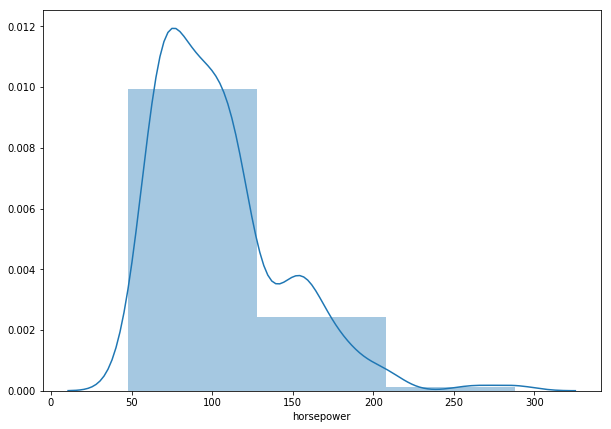

In [51]:
plt.figure(figsize=(10,7))
sns.distplot(df_sem_nulos['horsepower'], bins=3)

## Transformando dados - Variáveis categóricas

#### Dummy variable

In [52]:
df[['fuel-type']].head()

,fuel-type
0,gas
1,gas
2,gas
3,gas
4,gas


In [53]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [54]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop('fuel-type', axis = 1, inplace=True)

In [55]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'horsepower-binned', 'price-binned',
       'diesel', 'gas'],
      dtype='object')